In [44]:
from pandas_ods_reader import read_ods
import pandas as pd
base_path = "agrihack.ods"
sheet_index = 1
df = read_ods(base_path , sheet_index )
df.head()

,temperature,humidity,moisture,ir_value,output
0,25.0,70.0,70.0,7.0,1.0
1,30.0,70.0,70.0,7.0,1.0
2,35.0,70.0,70.0,7.0,1.0
3,25.0,75.0,70.0,7.0,1.0
4,30.0,75.0,70.0,7.0,1.0


In [45]:
df.shape

(147, 5)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  147 non-null    float64
 1   humidity     147 non-null    float64
 2   moisture     147 non-null    float64
 3   ir_value     147 non-null    float64
 4   output       147 non-null    float64
dtypes: float64(5)
memory usage: 5.9 KB


<AxesSubplot: >

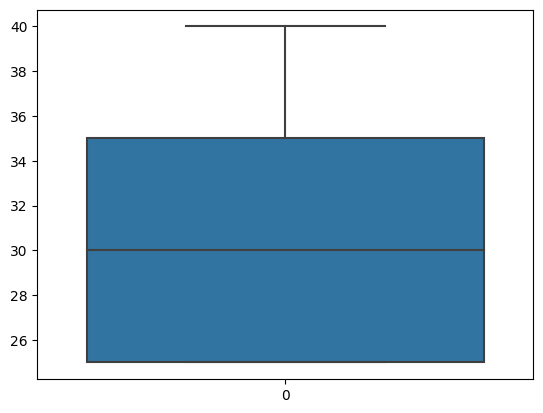

In [26]:
import seaborn as sb
sb.boxplot(df['temperature'])

<AxesSubplot: >

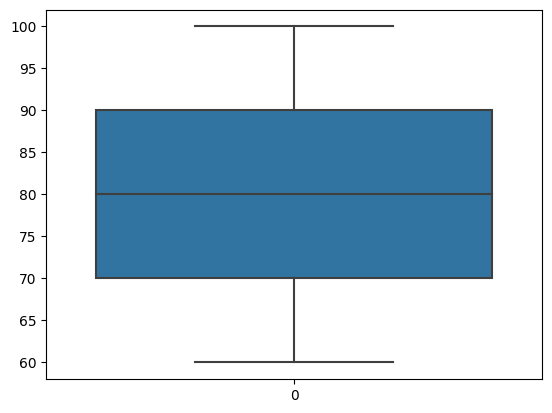

In [27]:
sb.boxplot(df['moisture'])

<AxesSubplot: >

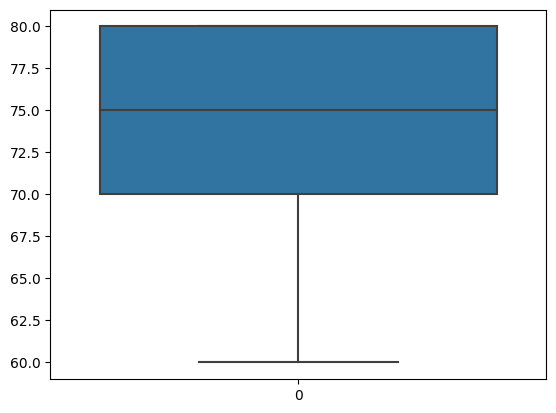

In [28]:
sb.boxplot(df['humidity'])

In [29]:
import matplotlib.pyplot as plt

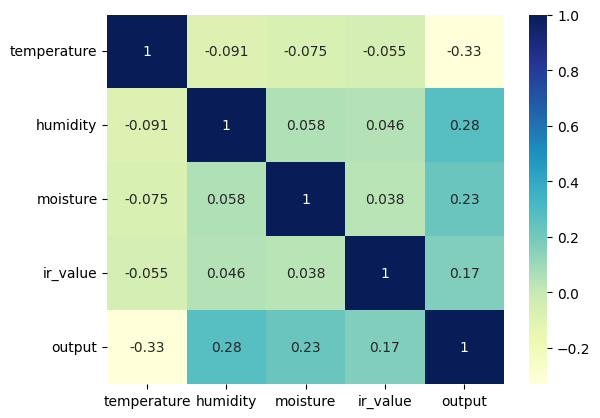

In [30]:
sb.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [31]:
df.columns

Index(['temperature', 'humidity', 'moisture', 'ir_value', 'output'], dtype='object')

In [32]:
independent = df[['temperature','humidity','moisture','ir_value']]
dependent = df['output']

In [33]:
independent.head()

,temperature,humidity,moisture,ir_value
0,25.0,70.0,70.0,7.0
1,30.0,70.0,70.0,7.0
2,35.0,70.0,70.0,7.0
3,25.0,75.0,70.0,7.0
4,30.0,75.0,70.0,7.0


In [34]:
dependent.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: output, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(independent,dependent,test_size=0.2,random_state=2)

from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Train the XGBoost model
model = XGBRegressor()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

In [36]:
x_train.head()

,temperature,humidity,moisture,ir_value
14,35.0,75.0,80.0,7.0
99,25.0,70.0,100.0,14.0
128,35.0,80.0,80.0,9.0
120,25.0,70.0,80.0,9.0
45,25.0,70.0,80.0,10.0


In [37]:
y_train.head()

14     1.0
99     1.0
128    1.0
120    1.0
45     1.0
Name: output, dtype: float64

In [38]:
df.columns

Index(['temperature', 'humidity', 'moisture', 'ir_value', 'output'], dtype='object')

In [39]:
user_input = pd.DataFrame({
    'temperature':40,
    'humidity':30,
    'moisture':20,
    'ir_value':30,
},index=[0])
model.predict(user_input)

array([0.00053572], dtype=float32)

In [47]:
user_input = [[40,2,0,3]]
model.predict(user_input)

ValueError: training data did not have the following fields: temperature, humidity, moisture, ir_value

In [41]:
df = pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df.head()

,Actual,Prediction
91,1.0,0.999986
127,1.0,0.999986
3,1.0,0.999986
35,1.0,0.999986
134,1.0,0.999986


In [42]:
# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score: ", r2)

R^2 Score:  0.0


In [43]:
from joblib import dump
dump(model, 'bph_prediction.json')

['bph_prediction.json']